# Predicting Financial Time Series Data with Machine Learning

This is a sample that predicts future prices from past price movements.
Here we implement it with EUR/USD rate as an example, but you can convert it to stock price by editing the symbol.


C:\Users\murta\AppData\Local\Temp\ipykernel_31164\3961892137.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-07-25 00:00:00,1.106562,1.106684,1.106317,1.106684,1.106684,0
2023-07-25 00:30:00,1.106684,1.106684,1.106439,1.106562,1.106562,0
2023-07-25 01:00:00,1.106562,1.106929,1.106562,1.106929,1.106929,0
2023-07-25 01:30:00,1.107052,1.107297,1.106929,1.107052,1.107052,0
2023-07-25 02:00:00,1.107052,1.107911,1.107052,1.107911,1.107911,0


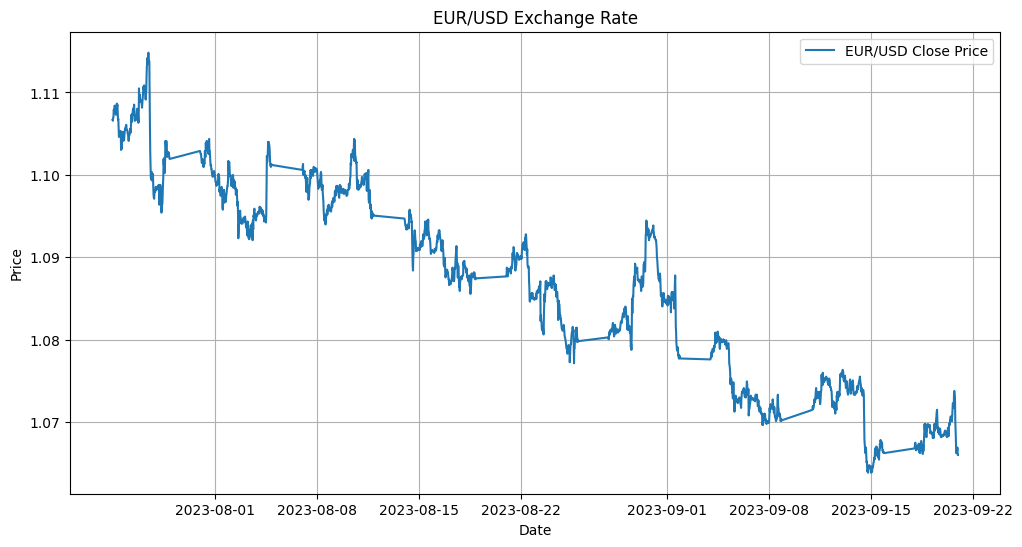

In [5]:
import datetime
import numpy as np
import pandas as pd
import yfinance as yf  # Import yfinance for data retrieval
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display

%matplotlib inline

# Define the ticker symbol for EUR/USD
ticker_symbol = 'EURUSD=X'

# Define the date range
d1 = datetime.datetime(2023, 7, 25)
d2 = datetime.datetime(2023, 9, 21)

try:
    # Fetching data from Yahoo Finance
    data = yf.download(ticker_symbol, start=d1, end=d2,
                       interval='30m', progress=False)

    # Display the first few rows of the data
    display(data.head())

    # You can now work with the 'data' DataFrame for your analysis or plotting.
    
    # Example: Plotting the Close prices
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='EUR/USD Close Price')
    plt.title('EUR/USD Exchange Rate')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()
    
except Exception as e:
    print(f"An error occurred: {str(e)}")


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-07-25 00:00:00,0.9037,0.9036,0.9039,0.9036,0.9036,0
2023-07-25 00:30:00,0.9036,0.9036,0.9038,0.9037,0.9037,0
2023-07-25 01:00:00,0.9037,0.9034,0.9037,0.9034,0.9034,0
2023-07-25 01:30:00,0.9033,0.9031,0.9034,0.9033,0.9033,0
2023-07-25 02:00:00,0.9033,0.9026,0.9033,0.9026,0.9026,0


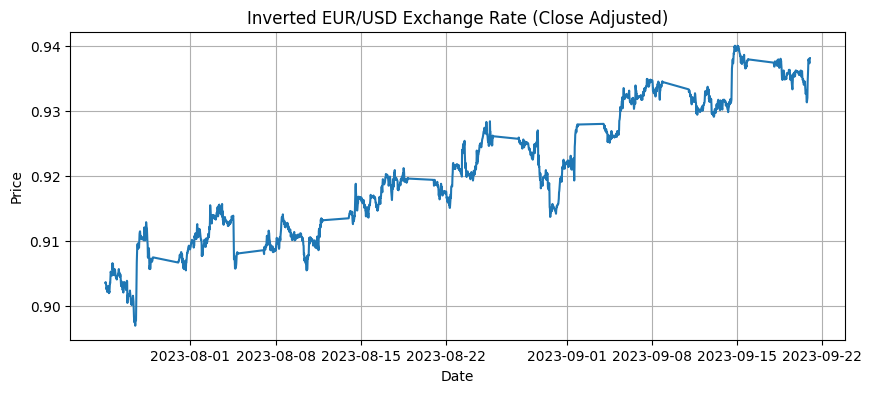

In [6]:
# Put data into Pandas Dataframe
df = pd.DataFrame(data)
df[['Open','High','Low','Close','Adj Close']] = df[['Open','High','Low','Close','Adj Close']].applymap(lambda x: 1.0/x)
# Display the first few rows of the DataFrame
display(df.head())

# Plot the 'Close Adjusted' column
plt.figure(figsize=(10, 4))
plt.plot(df['Adj Close'], label='Inverted Close Adjusted Price')
plt.title('Inverted EUR/USD Exchange Rate (Close Adjusted)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

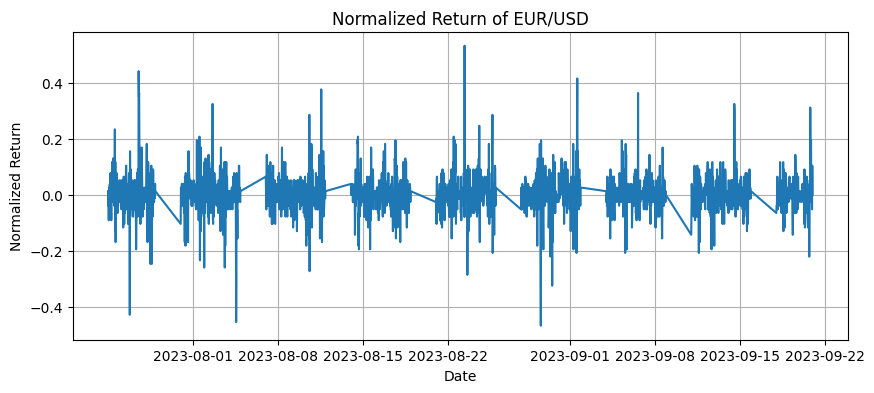

In [7]:
# Normalize aclose value and plot 'return' column
df['Return'] = df['Adj Close'] - df['Adj Close'].shift(1)
return_range = df['Return'].max() - df['Return'].min()
df['Return'] = df['Return'] / return_range

plt.figure(figsize=(10, 4))
plt.plot(df['Return'], label='Return')
plt.title('Normalized Return of EUR/USD')
plt.xlabel('Date')
plt.ylabel('Normalized Return')
plt.grid(True)
plt.show()


In [8]:
# Make label, 1 as rising price, 0 as falling price
df['Label'] = df['Return'].shift(-1)
df['Label'] = df['Label'].apply(lambda x: 1 if x > 0.0 else 0)

# Display the tail of the DataFrame with labels
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Return,Label
Datetime,,,,,,,,
2023-09-20 21:30:00,0.9377,0.9377,0.9379,0.9377,0.9377,0,0.000000,0
2023-09-20 22:00:00,0.9376,0.9374,0.9378,0.9377,0.9377,0,0.000000,0
2023-09-20 22:30:00,0.9377,0.9373,0.9378,0.9373,0.9373,0,-0.051951,1
2023-09-20 23:00:00,0.9375,0.9375,0.9381,0.9381,0.9381,0,0.103893,0
2023-09-20 23:30:00,0.9381,0.9381,0.9384,0.9381,0.9381,0,0.000000,0


In [106]:

# Reset the index of the DataFrame
df.reset_index(drop=True, inplace=True)

n_features = 13  # number of features

train_x = np.array([]).reshape([-1, n_features])
train_y = np.array([]).reshape([-1, 1])

# Check if 'Label' is in the columns of your DataFrame
if 'Label' not in df.columns:
    print("The 'Label' column does not exist in your DataFrame.")
else:
    for index, row in df.iterrows():
        i = df.index.get_loc(index)
        if i < n_features:
            continue

        _x = np.array(df[i - n_features + 1:i + 1]['Return']).T.reshape([1, -1])
        print(df)
        _y = df.loc[i, 'Label']  # Use 'loc' method to access DataFrame values

        train_x = np.vstack((train_x, _x))
        train_y = np.vstack((train_y, _y))

    # Reshape train_y to 1D array
    train_y = train_y.reshape(-1)

    print(train_x.shape)
    print(train_y.shape)
    print('%% of Class 0: %f' % (np.count_nonzero(train_y == 0) / float(len(train_y))))
    print('%% of Class 1: %f' % (np.count_nonzero(train_y == 1) / float(len(train_y))))


        Open    High     Low   Close  Adj Close  Volume    Return  Label
0     0.9037  0.9036  0.9039  0.9036     0.9036       0       NaN      1
1     0.9036  0.9036  0.9038  0.9037     0.9037       0  0.012996      0
2     0.9037  0.9034  0.9037  0.9034     0.9034       0 -0.038967      0
3     0.9033  0.9031  0.9034  0.9033     0.9033       0 -0.012987      0
4     0.9033  0.9026  0.9033  0.9026     0.9026       0 -0.090907      1
...      ...     ...     ...     ...        ...     ...       ...    ...
1987  0.9377  0.9377  0.9379  0.9377     0.9377       0  0.000000      0
1988  0.9376  0.9374  0.9378  0.9377     0.9377       0  0.000000      0
1989  0.9377  0.9373  0.9378  0.9373     0.9373       0 -0.051951      1
1990  0.9375  0.9375  0.9381  0.9381     0.9381       0  0.103893      0
1991  0.9381  0.9381  0.9384  0.9381     0.9381       0  0.000000      0

[1992 rows x 8 columns]
        Open    High     Low   Close  Adj Close  Volume    Return  Label
0     0.9037  0.9036  0.90

In [117]:
# Define Model and fit
# Here we use 95% of data for training, and last 5% for testing

from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=0, learning_rate=0.01, n_estimators=10000)

train_len = int(len(train_x)*0.95)
clf.fit(train_x[:train_len], train_y[:train_len])

accuracy = clf.score(train_x[train_len:], train_y[train_len:])
print('Testing Accuracy: %f' % accuracy)

Testing Accuracy: 0.656566


,Return,Label,Pred,Won,Pnl,Equity
93,0.0000,0.0,0.0,True,0.000000,122.001062
94,0.0000,0.0,1.0,False,-0.000000,122.001062
95,-0.0004,0.0,1.0,False,-4.000263,118.000799
96,0.0008,1.0,1.0,True,7.999746,126.000545
97,0.0000,0.0,1.0,False,-0.000000,126.000545


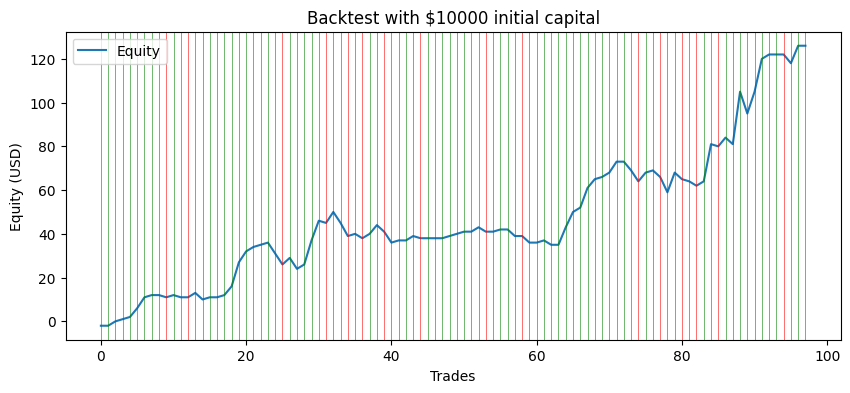

In [119]:
# Predict test data

pred = clf.predict(train_x[train_len:])


# Calculate equity..

contracts  = 10000.0
commission = 0.0


df_trade = pd.DataFrame(train_x[train_len:,-1], columns=['Return'])
df_trade['Label']  = train_y[train_len:]
df_trade['Pred']   = pred
df_trade['Won']    = df_trade['Label'] == df_trade['Pred']
df_trade['Return'] = df_trade['Return'].shift(-1) * return_range
df_trade.drop(df_trade.index[len(df_trade)-1], inplace=True)

def calc_profit(row):
    if row['Won']:
        return abs(row['Return'])*contracts - commission
    else:
        return -abs(row['Return'])*contracts - commission

df_trade['Pnl'] = df_trade.apply(lambda row: calc_profit(row), axis=1)
df_trade['Equity'] = df_trade['Pnl'].cumsum()

display(df_trade.tail())
df_trade.plot(y='Equity', figsize=(10,4), title='Backtest with $10000 initial capital')
plt.xlabel('Trades')
plt.ylabel('Equity (USD)')
for r in df_trade.iterrows():
    if r[1]['Won']:
        plt.axvline(x=r[0], linewidth=0.5, alpha=0.8, color='g')
    else:
        plt.axvline(x=r[0], linewidth=0.5, alpha=0.8, color='r')

Net Profit            : $126.00
Number Winning Trades : 51
Number Losing Trades  : 29
Percent Profitable    : 63.75%
Avg Win Trade         : $4.392
Avg Los Trade         : $-3.379
Largest Win Trade     : $24.001
Largest Los Trade     : $-9.999
Profit Factor         : 2.29


<Axes: >

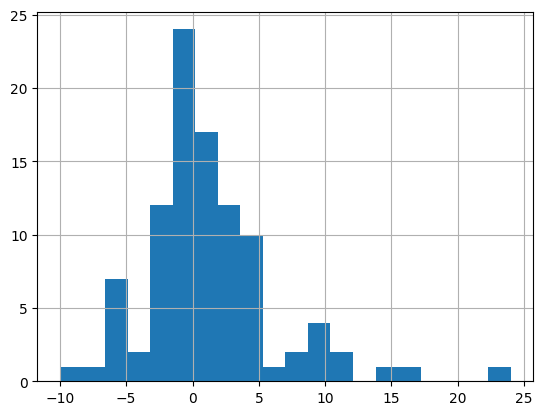

In [121]:
# Calculate summary of trades

n_win_trades = float(df_trade[df_trade['Pnl']>0.0]['Pnl'].count())
n_los_trades = float(df_trade[df_trade['Pnl']<0.0]['Pnl'].count())
print("Net Profit            : $%.2f" % df_trade.tail(1)['Equity'])
print("Number Winning Trades : %d" % n_win_trades)
print("Number Losing Trades  : %d" % n_los_trades)
print("Percent Profitable    : %.2f%%" % (100*n_win_trades/(n_win_trades + n_los_trades)))
print("Avg Win Trade         : $%.3f" % df_trade[df_trade['Pnl']>0.0]['Pnl'].mean())
print("Avg Los Trade         : $%.3f" % df_trade[df_trade['Pnl']<0.0]['Pnl'].mean())
print("Largest Win Trade     : $%.3f" % df_trade[df_trade['Pnl']>0.0]['Pnl'].max())
print("Largest Los Trade     : $%.3f" % df_trade[df_trade['Pnl']<0.0]['Pnl'].min())
print("Profit Factor         : %.2f" % abs(df_trade[df_trade['Pnl']>0.0]['Pnl'].sum()/df_trade[df_trade['Pnl']<0.0]['Pnl'].sum()))

df_trade['Pnl'].hist(bins=20)